# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
# Target URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create data frame to hold city weather data
column_names = ("City", "Cloudliness", "Country", "Date", "Humidity", "Lat", "Lng","Max Temp", "Wind Speed")
cities_weather_df = pd.DataFrame(columns = column_names)
cities_weather_df

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [61]:
# Iterate to get city weather data in OpenWeatherMap
row_index = 0
record_count = 1
set_count = 1

print("Beginning Data Retrieval\n"
      "-----------------------------"
        )

for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        print('Processing Record', record_count, 'of Set', set_count, '|', city)
        print(weather_response.url)
        city_name = weather_json["name"]
        cloud = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        # Append Weather Data without duplicating City
        if city_name not in cities_weather_df.City.values:
            
            # Append data to df columns
            cities_weather_df.at[row_index,"City"] = city_name
            cities_weather_df.at[row_index,"Cloudliness"] = cloud
            cities_weather_df.at[row_index, "Country"] = country
            cities_weather_df.at[row_index, "Date"] = date
            cities_weather_df.at[row_index, "Humidity"] = humidity
            cities_weather_df.at[row_index, "Lat"] = latitude
            cities_weather_df.at[row_index, "Lng"] = longitude
            cities_weather_df.at[row_index, "Max Temp"] = max_temp
            cities_weather_df.at[row_index, "Wind Speed"] = wind_speed
                  
            row_index += 1
            record_count += 1
            if record_count == 50:
                set_count += 1
                record_count = 0
        
            # Delay 1 sec before next loop
            time.sleep(1)
        else:
            pass
    
    elif weather_json['cod'] == 404:
        print('City not found. Skipping...')
           
    else:
        pass

    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bluff&units=imperial
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=punta%20arenas&units=imperial
Processing Record 3 of Set 1 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=grand%20gaube&units=imperial
Processing Record 4 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=hobart&units=imperial
Processing Record 5 of Set 1 | bagan
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bagan&units=imperial
Processing Record 6 of Set 1 | banjar
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=banjar&units=imperial
Processing Record 7 of Set 1 | burn

Processing Record 4 of Set 2 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=vestmannaeyjar&units=imperial
Processing Record 5 of Set 2 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=baykit&units=imperial
Processing Record 6 of Set 2 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=clyde%20river&units=imperial
Processing Record 7 of Set 2 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=beringovskiy&units=imperial
Processing Record 8 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=arraial%20do%20cabo&units=imperial
Processing Record 9 of Set 2 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=rawson&units=imperial
Processing Record 10 of Set 2 | klaksvik
http://ap

Processing Record 8 of Set 3 | jinchang
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=jinchang&units=imperial
Processing Record 9 of Set 3 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=iqaluit&units=imperial
Processing Record 10 of Set 3 | moerai
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=moerai&units=imperial
Processing Record 11 of Set 3 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=verkhoyansk&units=imperial
Processing Record 12 of Set 3 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=souillac&units=imperial
Processing Record 13 of Set 3 | koson
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=koson&units=imperial
Processing Record 14 of Set 3 | albany
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 12 of Set 4 | otukpo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=otukpo&units=imperial
Processing Record 13 of Set 4 | linxia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=linxia&units=imperial
Processing Record 14 of Set 4 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kruisfontein&units=imperial
Processing Record 15 of Set 4 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kahului&units=imperial
Processing Record 16 of Set 4 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=avarua&units=imperial
Processing Record 17 of Set 4 | kitimat
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=kitimat&units=imperial
Processing Record 18 of Set 4 | meadow lake
http://api.openweathermap.org/data/2.5/weather

Processing Record 16 of Set 5 | bayir
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bayir&units=imperial
Processing Record 17 of Set 5 | naze
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=naze&units=imperial
Processing Record 18 of Set 5 | bedford
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=bedford&units=imperial
Processing Record 19 of Set 5 | general pico
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=general%20pico&units=imperial
Processing Record 20 of Set 5 | yaan
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=yaan&units=imperial
Processing Record 21 of Set 5 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=solnechnyy&units=imperial
Processing Record 22 of Set 5 | nome
http://api.openweathermap.org/data/2.5/weather?appid=6e

Processing Record 19 of Set 6 | tacna
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tacna&units=imperial
Processing Record 20 of Set 6 | faya
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=faya&units=imperial
Processing Record 21 of Set 6 | brigantine
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=brigantine&units=imperial
Processing Record 22 of Set 6 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=thinadhoo&units=imperial
Processing Record 23 of Set 6 | zabaykalsk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=zabaykalsk&units=imperial
Processing Record 24 of Set 6 | mozarlandia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mozarlandia&units=imperial
Processing Record 25 of Set 6 | novobiryusinskiy
http://api.openweathermap.org/d

Processing Record 22 of Set 7 | podor
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=podor&units=imperial
Processing Record 23 of Set 7 | shimoda
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=shimoda&units=imperial
Processing Record 24 of Set 7 | moree
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=moree&units=imperial
Processing Record 25 of Set 7 | neyshabur
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=neyshabur&units=imperial
Processing Record 26 of Set 7 | necocli
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=necocli&units=imperial
Processing Record 27 of Set 7 | luorong
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=luorong&units=imperial
Processing Record 28 of Set 7 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=6e0

Processing Record 26 of Set 8 | assiniboia
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=assiniboia&units=imperial
Processing Record 27 of Set 8 | utkivka
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=utkivka&units=imperial
Processing Record 28 of Set 8 | zhuanghe
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=zhuanghe&units=imperial
Processing Record 29 of Set 8 | sabang
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sabang&units=imperial
Processing Record 30 of Set 8 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=quatre%20cocos&units=imperial
Processing Record 31 of Set 8 | nouakchott
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=nouakchott&units=imperial
Processing Record 32 of Set 8 | libreville
http://api.openweathermap.o

Processing Record 29 of Set 9 | livingston
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=livingston&units=imperial
Processing Record 30 of Set 9 | tres passos
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tres%20passos&units=imperial
Processing Record 31 of Set 9 | loreto
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=loreto&units=imperial
Processing Record 32 of Set 9 | malinovoye ozero
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=malinovoye%20ozero&units=imperial
Processing Record 33 of Set 9 | suffolk
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=suffolk&units=imperial
Processing Record 34 of Set 9 | port said
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=port%20said&units=imperial
Processing Record 35 of Set 9 | lichtenburg
http://api

Processing Record 32 of Set 10 | zaozerne
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=zaozerne&units=imperial
Processing Record 33 of Set 10 | sao luiz gonzaga
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=sao%20luiz%20gonzaga&units=imperial
Processing Record 34 of Set 10 | mingoyo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=mingoyo&units=imperial
Processing Record 35 of Set 10 | san isidro
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=san%20isidro&units=imperial
Processing Record 36 of Set 10 | beidao
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=beidao&units=imperial
Processing Record 37 of Set 10 | gorontalo
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=gorontalo&units=imperial
Processing Record 38 of Set 10 | divnogorsk
http://api

Processing Record 35 of Set 11 | tulum
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=tulum&units=imperial
Processing Record 36 of Set 11 | luganville
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=luganville&units=imperial
Processing Record 37 of Set 11 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=saint-pierre&units=imperial
Processing Record 38 of Set 11 | batagay
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=batagay&units=imperial
Processing Record 39 of Set 11 | haikou
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=haikou&units=imperial
Processing Record 40 of Set 11 | suksun
http://api.openweathermap.org/data/2.5/weather?appid=6e06426775b129fddc0168566dae40cb&q=suksun&units=imperial
Processing Record 41 of Set 11 | calvinia
http://api.openweathermap.org/data/2.5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
#Save city data to output_data/cities.csv
cities_weather_df.to_csv(output_data_file, encoding="utf-8", index=False)

#Preview the dataframe
cities_weather_df.head()

,City,Cloudliness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,0,AU,1547519766,40,-23.58,149.07,93.13,11.43
1,Punta Arenas,75,CL,1547517600,66,-53.16,-70.91,55.4,8.05
2,Grand Gaube,40,MU,1547517600,78,-20.01,57.66,78.8,3.36
3,Hobart,0,AU,1547517600,57,-42.88,147.33,75.2,16.11
4,Bagan,68,RU,1547519901,85,54.1,77.67,18.25,9.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

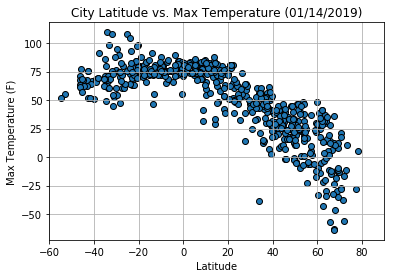

In [63]:
# Build a scatter plot City Latitude vs. Max Temperature

plt.scatter(cities_weather_df["Lat"], cities_weather_df["Max Temp"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)


# Save the figure
plt.savefig("lat_vs_maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

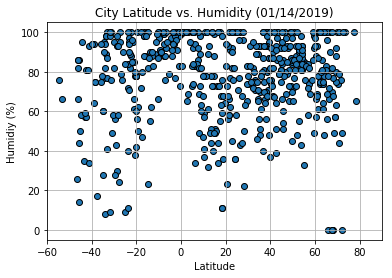

In [64]:
# City Latitude vs Humidity
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Humidity"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Humidiy (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

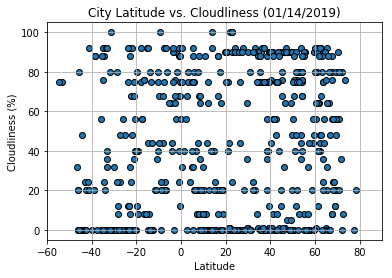

In [65]:
# City Latitude vs Cloudliness
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Cloudliness"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Cloudliness {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Cloudliness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
         
# Save the figure
plt.savefig("lat_vs_cloudliness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

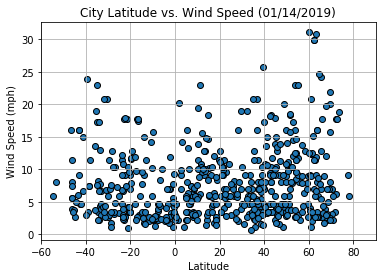

In [66]:
# City Latitude vs Wind Speed
plt.scatter(cities_weather_df["Lat"], cities_weather_df["Wind Speed"], marker="o", edgecolors="black")

# Add chart labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('(%m/%d/%Y)')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()